### 목표
- iris 데이터를 활용한 붓꽃 품종 분류 진행
- 신경망에서 다중 분류 학습을 진행해보자.

In [3]:
# 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 데이터 셋 확보
from sklearn.datasets import load_iris
# 데이터 셋 객체 생성
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# 문제 데이터
X = iris['data']
# 정답 데이터
y = iris['target']

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [10]:
# 가독성을 위해 데이터 프레임화 시켜주기
X = pd.DataFrame(X, columns=iris['feature_names'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 65)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [13]:
# 정답 데이터 확인 - 다중 분류
np.unique(y_train)

array([0, 1, 2])

In [14]:
# 다중 분류에서는 정답 데이터를 원핫인코딩 진행
# 정답 데이터는 array -> numpy -> pd.get_dummies 사용 불가
# 텐서플로우에서 제공하는 원핫인코딩 방법 사용해보기
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0

### 신경망 모델링

In [16]:
# 1. 신경망 구조 설계
# 재료 가져오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# 신경망 뼈대 구축
model = Sequential()

# 입력층 설정
model.add(Dense(units=16, input_dim=4, activation='relu'))

# 중간층(은닉층) 설정
model.add(Dense(units=32, activation= 'relu'))
model.add(Dense(units=16, activation= 'relu'))
model.add(Dense(units=8, activation= 'relu'))

# 출력층 설정
# 다중 분류 : 출력층의 뉴런 개수는 정답 데이터의 종류 개수만큼 설정
model.add(Dense(units= 3, activation='softmax'))

In [21]:
# 2. 학습 / 평가방법 설정
# 우리가 진행하는 실습은 다중 분류 실습이다.
# 다중 분류에 맞는 손실함수를 설정하자
# 이진 분류 : binary_crossentropy
# 다중 분류 : categorical_crossentropy
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [22]:
# 모델 학습
h = model.fit(X_train, y_train, # 정답은 원핫인코딩이 진행된 데이터 넣어주기!
              epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 5ms/step - loss: 1.0528 - accuracy: 0.6476
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0124 - accuracy: 0.4952
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 0.9838 - accuracy: 0.6571
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.9652 - accuracy: 0.6571
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.9447 - accuracy: 0.6571
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.9253 - accuracy: 0.6667
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.9029 - accuracy: 0.6667
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.8812 - accuracy: 0.6667
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.8585 - accuracy: 0.6667
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 0.8358 - accuracy: 0.6667
Epoch 11/300
4/4 [===========

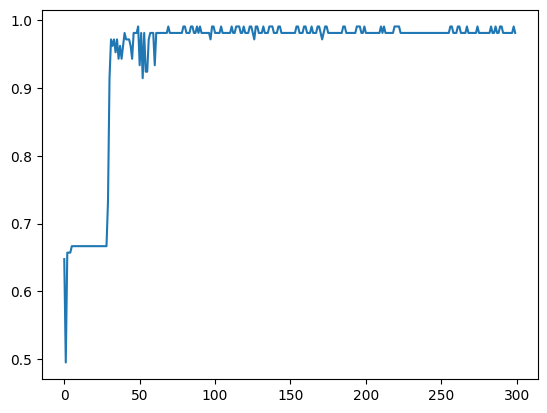

In [25]:
# 시각화
plt.plot(h.history['accuracy'])
plt.show()

In [26]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.1206 - accuracy: 0.9556


[0.12064976990222931, 0.9555555582046509]